# Sentiment Analysis of News Headlines
Download a public dataset of news headlines, compute their sentiment (positive/neutral/negative) using VADER, visualize the distribution, and inspect examples.

In [9]:
#!pip install pandas matplotlib nltk vaderSentiment requests tqdm


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import json, requests, io, os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA
from tqdm import tqdm

#nltk.download('vader_lexicon', quiet=True)
analyzer = SIA()

In [40]:
DATA_URL = ('https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/'
            'master/Sarcasm_Headlines_Dataset.json')

response = requests.get(DATA_URL)
rows = [json.loads(line) for line in response.text.splitlines() if line.strip()]

df = pd.DataFrame(rows)
df = df.rename(columns={'headline': 'text'})[['text']]#保留文本并重命名

print(len(df))
df.head()


28619


,text
0,thirtysomething scientists unveil doomsday clo...
1,dem rep. totally nails why congress is falling...
2,eat your veggies: 9 deliciously different recipes
3,inclement weather prevents liar from getting t...
4,mother comes pretty close to using word 'strea...


In [35]:
def classify_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    return 'neutral'

tqdm.pandas(desc='Scoring')#进度可视化
df['sentiment'] = df['text'].progress_apply(classify_sentiment)

df.head()

Scoring: 100%|█████████████████████████████████████████████████████████████████| 28619/28619 [00:05<00:00, 5030.44it/s]


,text,sentiment
0,thirtysomething scientists unveil doomsday clo...,negative
1,dem rep. totally nails why congress is falling...,negative
2,eat your veggies: 9 deliciously different recipes,positive
3,inclement weather prevents liar from getting t...,negative
4,mother comes pretty close to using word 'strea...,positive


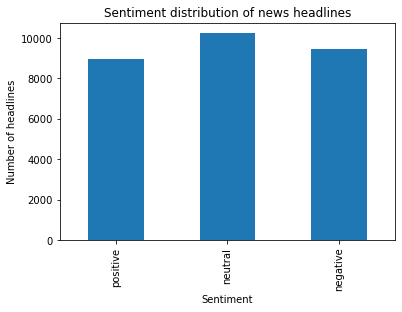

In [36]:
counts = df['sentiment'].value_counts().reindex(['positive','neutral','negative']).fillna(0)

plt.figure(figsize=(6,4))

counts.plot(kind='bar')#柱状图
plt.title('Sentiment distribution of news headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of headlines')
plt.show()

In [7]:
#示例
for label in ['positive','negative','neutral']:
    print(f'\nSample {label} headlines:')
    display(df[df['sentiment']==label].sample(5, random_state=42)['text'])


Sample positive headlines:


22749    wednesday's morning email: what the georgia sp...
10432    restaurant teaches former inmates to cook, hel...
7036     this could be 'one of the warmest christmas da...
19571        teen newsweek reports north korea is the bomb
21482    don't sleep on target's chic new modern home c...
Name: text, dtype: object


Sample negative headlines:


22889      paris terror harms france, islam, and the world
22021                   puerto rico is a man-made disaster
12019    coworker retreats to remote corner of office t...
27338    mick mulvaney, supporter of 2013 government sh...
798                    nation's moms demand christmas list
Name: text, dtype: object


Sample neutral headlines:


27714    fbi agent still tasked with following noam cho...
19614    english professor suddenly realizes students w...
13371    area man a walking encyclopedia of everything ...
5448     report: really old tenant probably pays much c...
6980     rhode island votes to move 2008 primary to tom...
Name: text, dtype: object